# Distracted Driver MultiAction Classification

In [3]:
import os
os.getcwd()

'D:\\sunil\\DLProject4'

## Import Libraries

In [11]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout

In [218]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation, BatchNormalization

In [212]:
import cv2

In [13]:
len(os.listdir('test'))

79726

In [16]:
print(len(os.listdir('train/c0')))

2489


In [18]:
print(len(os.listdir('train/c1')))
print(len(os.listdir('train/c2')))
print(len(os.listdir('train/c3')))
print(len(os.listdir('train/c4')))
print(len(os.listdir('train/c5')))
print(len(os.listdir('train/c6')))
print(len(os.listdir('train/c7')))
print(len(os.listdir('train/c8')))
print(len(os.listdir('train/c9')))

2267
2317
2346
2326
2312
2325
2002
1911
2129


In [19]:
# model=Sequential()
# model.add(Conv2D(32,(5,5),input_shape=(64,64,3),activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(64,(5,5),activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Flatten())
# model.add(Dense(1024,activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(200,activation='relu'))
# model.add(Dropout(0.2))

# model.add(Dense(10,activation="relu"))

In [20]:
# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [33]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,validation_split=0.20)

In [22]:
test_datagen = ImageDataGenerator(rescale=1./255)

## Image Generators

In [34]:
train_generator = train_datagen.flow_from_directory(
        'train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        subset='training'
        )

Found 17943 images belonging to 10 classes.


In [35]:
validation_generator = train_datagen.flow_from_directory(
        'train',
         target_size=(64, 64),
         batch_size=32,
        class_mode='categorical',
         subset='validation'
        )

Found 4481 images belonging to 10 classes.


In [142]:
test_generator = test_datagen.flow_from_directory(
    './Test1',
        target_size=(64, 64),
        batch_size=2,
        shuffle=False,
        class_mode='categorical',classes=['Test1']
    
)

Found 79726 images belonging to 1 classes.


## Layers

In [46]:
mod = Sequential()
mod.add(Conv2D(32,kernel_size=(5,5),activation='relu',input_shape=(64,64,3)))
mod.add(BatchNormalization())
mod.add(MaxPooling2D(pool_size=(2,2),padding='same'))
mod.add(Dropout(0.3))
mod.add(Conv2D(64,kernel_size=(5,5),activation='relu',padding='same'))
mod.add(BatchNormalization())
mod.add(MaxPooling2D(pool_size=(2,2),padding='same'))
mod.add(Dropout(0.3))
mod.add(Conv2D(128,kernel_size=(5,5),activation='relu',padding='same'))
mod.add(BatchNormalization())
mod.add(MaxPooling2D(pool_size=(2,2),padding='same'))
mod.add(Dropout(0.5))
mod.add(Flatten())
mod.add(Dense(units = 512,activation='relu'))
mod.add(BatchNormalization())
mod.add(Dropout(0.5))
mod.add(Dense(units = 128,activation='relu'))
mod.add(Dropout(0.25))
mod.add(Dense(10,activation='softmax'))

In [47]:
mod.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

## Model Fit

In [48]:
STEPS_PER_EPOCH = train_generator.n//train_generator.batch_size
VALIDATION_STEPS=validation_generator.n//train_generator.batch_size

In [49]:
model2=mod.fit(
        train_generator,
        steps_per_epoch=STEPS_PER_EPOCH,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=VALIDATION_STEPS)

Epoch 1/5
560/560 [==============================] - 569s 1s/step - loss: 1.9555 - accuracy: 0.3503 - val_loss: 1.4016 - val_accuracy: 0.4844
Epoch 2/5
560/560 [==============================] - 580s 1s/step - loss: 1.1019 - accuracy: 0.6080 - val_loss: 0.6570 - val_accuracy: 0.7717
Epoch 3/5
560/560 [==============================] - 584s 1s/step - loss: 0.7933 - accuracy: 0.7236 - val_loss: 0.4380 - val_accuracy: 0.8549
Epoch 4/5
560/560 [==============================] - 574s 1s/step - loss: 0.6146 - accuracy: 0.7903 - val_loss: 0.3707 - val_accuracy: 0.8868
Epoch 5/5
560/560 [==============================] - 581s 1s/step - loss: 0.5190 - accuracy: 0.8287 - val_loss: 0.2592 - val_accuracy: 0.9185


In [50]:
%matplotlib inline  
import matplotlib.pyplot as plt

## Accuracy & Loss Plots

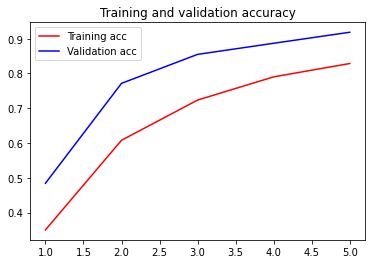

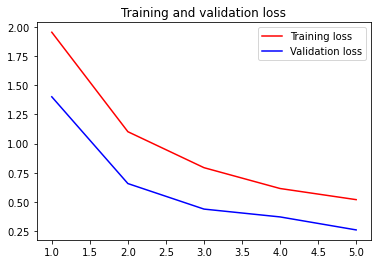

In [51]:
acc = model2.history['accuracy']
val_acc = model2.history['val_accuracy']
loss = model2.history['loss']
val_loss = model2.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
#plotting train and validation losses
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Predict  Generator

In [144]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred=mod.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

39863/39863 [==============================] - 1553s 39ms/step


In [145]:
pred

array([[1.7305439e-06, 5.3204044e-08, 4.7908128e-07, ..., 9.7636473e-08,
        1.0445950e-06, 4.8679722e-06],
       [1.3753398e-04, 2.4982660e-06, 3.0736155e-05, ..., 2.6737955e-05,
        6.5334949e-05, 1.2256030e-04],
       [1.0847434e-01, 7.5281775e-01, 1.9962897e-03, ..., 4.3186202e-04,
        1.6508729e-03, 9.2625059e-02],
       ...,
       [4.1846079e-03, 2.7776090e-03, 6.0881026e-02, ..., 2.2478862e-02,
        1.7531127e-01, 1.6006280e-01],
       [6.4399239e-07, 6.1657988e-07, 1.2392704e-01, ..., 1.0901040e-06,
        1.2151455e-03, 4.2192887e-08],
       [6.2397810e-08, 2.1961453e-09, 1.0168871e-11, ..., 3.7798101e-10,
        2.0696105e-07, 9.7500364e-05]], dtype=float32)

In [146]:
len(pred)

79726

In [155]:
labels_test_predictions = pd.DataFrame(pred)
labels_test_predictions

,0,1,2,3,4,5,6,7,8,9
0,1.730544e-06,5.320404e-08,4.790813e-07,1.652335e-07,3.960202e-07,0.999991,2.909425e-08,9.763647e-08,1.044595e-06,4.867972e-06
1,1.375340e-04,2.498266e-06,3.073616e-05,2.631879e-04,3.687149e-04,0.998959,2.341278e-05,2.673795e-05,6.533495e-05,1.225603e-04
2,1.084743e-01,7.528177e-01,1.996290e-03,1.807433e-02,2.232615e-02,0.000320,1.283117e-03,4.318620e-04,1.650873e-03,9.262506e-02
3,3.348594e-03,3.012411e-02,1.832465e-01,2.086120e-04,2.236726e-03,0.024858,6.409273e-01,1.189488e-03,7.192661e-02,4.193456e-02
4,2.597577e-02,9.820928e-06,7.573361e-05,8.860028e-01,3.713795e-02,0.044650,2.635997e-06,3.386161e-05,3.174535e-03,2.936851e-03
...,...,...,...,...,...,...,...,...,...,...
79721,1.463627e-03,2.413444e-01,3.692250e-03,7.770439e-06,3.664679e-04,0.696756,7.672360e-03,1.474616e-02,3.277188e-03,3.067383e-02
79722,3.191213e-02,9.086592e-01,2.215840e-02,2.875448e-02,1.896309e-04,0.000105,4.206556e-03,1.117384e-05,1.370779e-03,2.632967e-03
79723,4.184608e-03,2.777609e-03,6.088103e-02,1.405726e-03,4.887285e-01,0.029556,5.461388e-02,2.247886e-02,1.753113e-01,1.600628e-01
79724,6.439924e-07,6.165799e-07,1.239270e-01,3.763116e-10,3.938625e-07,0.000002,8.748530e-01,1.090104e-06,1.215145e-03,4.219289e-08


In [159]:
labels_test_predictions.columns = ["c"+str(x) for x in labels_test_predictions.columns]

In [161]:
labels_test_predictions.insert(0,"img",[x.split("\\")[1] for x in test_generator.filenames])

In [216]:
labels_test_predictions=labels_test_predictions.round(2)

In [217]:
labels_test_predictions.to_csv('Distracted_Driver_MultiAction_Classification.csv',index=False)

## Model Save

In [138]:
mod.save_weights('./driverdistraction_lr_weights.h5', overwrite=True)
mod.save('./driverdistraction.h5')